In [ ]:

####################################################################################################
# Plot activations of DENSE layers
#
# Load model for testing
####################################################################################################

from keras.models import load_model

test_model_name = './../Model/SN_512_256_x00/SN_512_256_x00_w-50-0.74-0.70-1.01-0.63.hdf5'
# 77.8 on maxprob


model = load_model(test_model_name)
# print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
__________

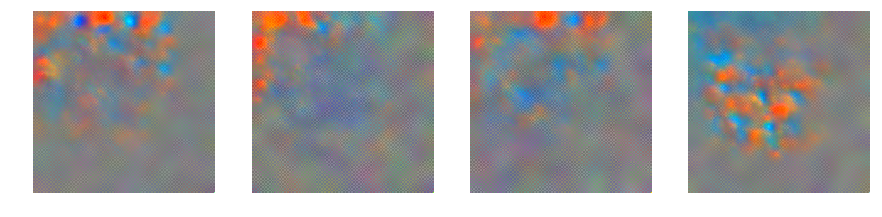

In [ ]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from keras.models import load_model
from vis.input_modifiers import Jitter


test_model_name = '/home/janciovec/Desktop/Model/SN_512_256_x00_w-50-0.74-0.70-1.01-0.63.hdf5'
# 77.8 on maxprob


model = load_model(test_model_name)
print model.summary()

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = -1 # utils.find_layer_idx(model, 'predictions')

classes = ['Normal', 'Benign', 'InSitu', 'Invasive']


# Swap softmax with linear
# model.layers[-1].activation = activations.linear
# model = utils.apply_modifications(model)

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
plt.figure(figsize=(15,6))
for i, c in enumerate(classes):
    img = visualize_activation(model, layer_idx, filter_indices=i)
    plt.subplot(1,4,1+i)
    plt.axis('off')
    plt.imshow(img)
# img = visualize_activation(model, layer_idx, filter_indices=3)
# plt.imshow(img)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
__________

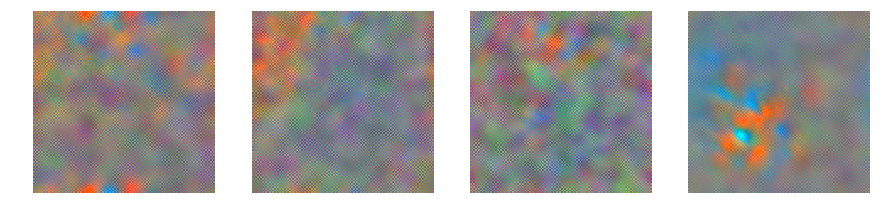

In [ ]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from keras.models import load_model
from vis.input_modifiers import Jitter


test_model_name = '/home/janciovec/Desktop/Model/SN_512_256_x00_w-50-0.74-0.70-1.01-0.63.hdf5'
# 77.8 on maxprob


model = load_model(test_model_name)
print model.summary()

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = 13 # utils.find_layer_idx(model, 'conv2d_1')
# layer_idx = utils.find_layer_idx(model, 'conv2d_1')
print layer_idx

classes = ['Normal', 'Benign', 'InSitu', 'Invasive']

# Swap softmax with linear
# model.layers[-1].activation = activations.linear
# model = utils.apply_modifications(model)

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
plt.figure(figsize=(15,6))
for i, c in enumerate(classes):
    img = visualize_activation(model, layer_idx, filter_indices=i, verbose=False,
                              input_modifiers=[Jitter(0.05)])
    # input_modifiers=[Jitter(16)]
    plt.subplot(1,4,1+i)
    plt.axis('off')
    plt.imshow(img)
# img = visualize_activation(model, layer_idx, filter_indices=3)
# plt.imshow(img)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        36928     
__________

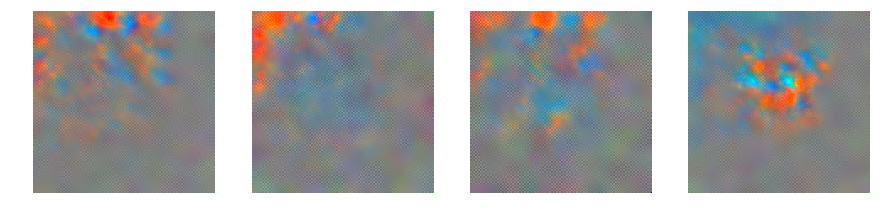

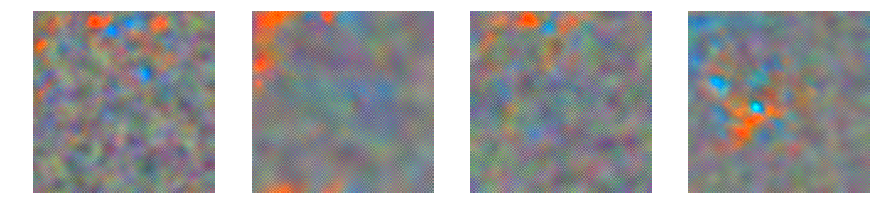

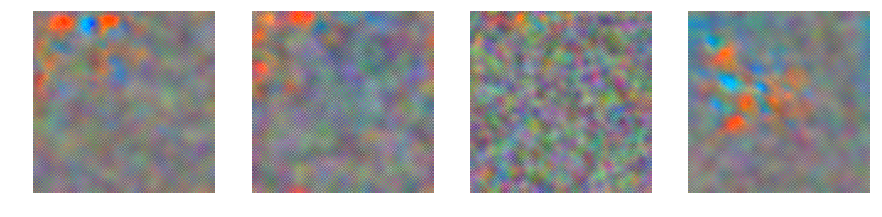

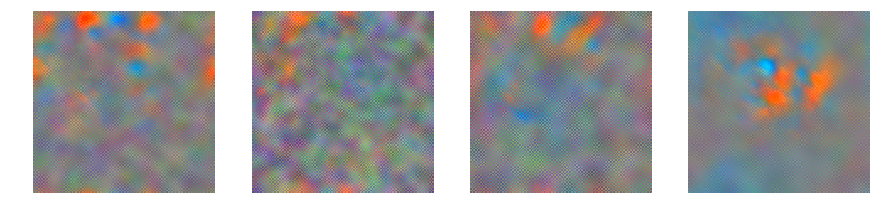

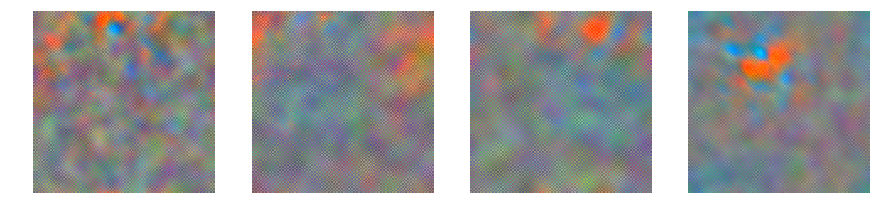

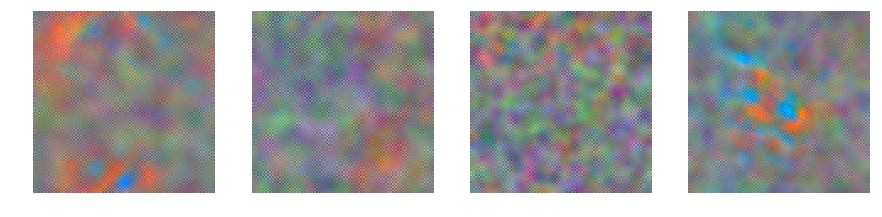

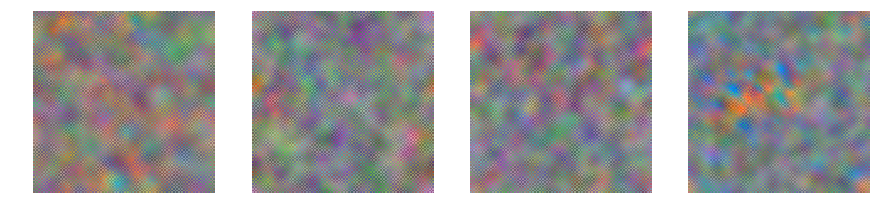

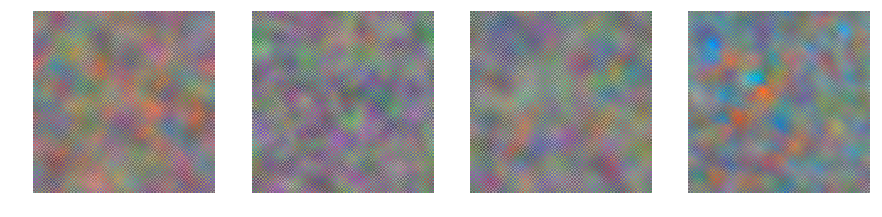

In [ ]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from keras.models import load_model
from vis.input_modifiers import Jitter
from vis.visualization import visualize_activation
from matplotlib import pyplot as plt

test_model_name = '/home/janciovec/Desktop/Model/SN_512_256_x00_w-50-0.74-0.70-1.01-0.63.hdf5'
# 77.8 on maxprob

model = load_model(test_model_name)
print model.summary()

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = -1 # utils.find_layer_idx(model, 'conv2d_1')
# layer_idx = utils.find_layer_idx(model, 'conv2d_1')
print layer_idx

classes = ['Normal', 'Benign', 'InSitu', 'Invasive']

# Swap softmax with linear
# model.layers[-1].activation = activations.linear
# model = utils.apply_modifications(model)

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

for J in [0, 1, 2, 4, 8, 16, 32, 64]:

    plt.figure(figsize=(15,6))
    for i, c in enumerate(classes):
        img = visualize_activation(model, layer_idx, filter_indices=i, verbose=False,  #  max_iter=500,
                                  input_modifiers=[Jitter(J)])
        plt.subplot(1,4,1+i)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


In [ ]:
# Activations of filters

In [ ]:
# Images from 4 classes



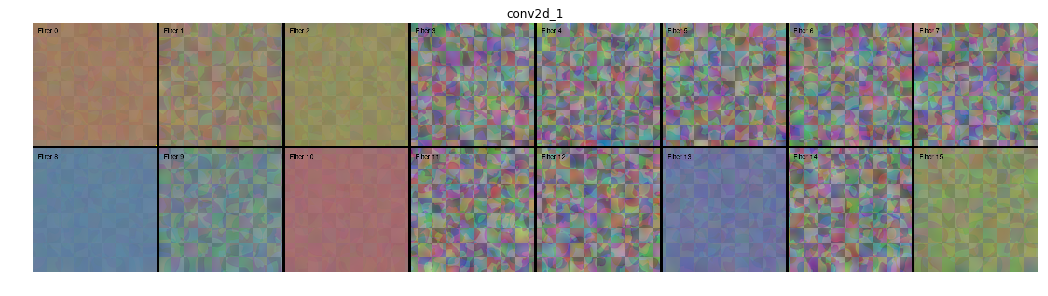

In [ ]:
from vis.visualization import get_num_filters
import numpy as np

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_1'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)

    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

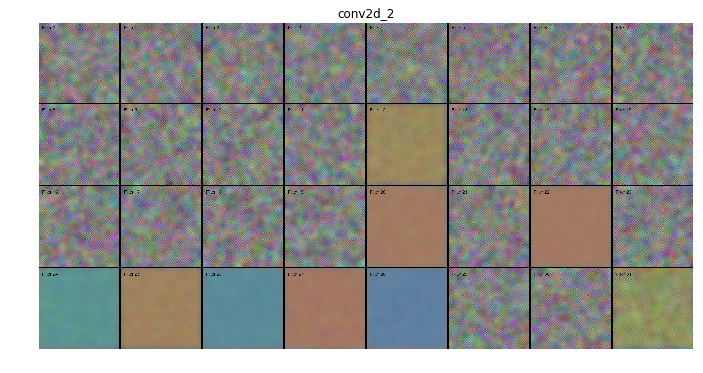

KeyboardInterrupt: 

In [ ]:
from vis.visualization import get_num_filters
import numpy as np

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_2'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)

    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

from vis.visualization import get_num_filters
import numpy as np

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_3'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)

    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

from vis.visualization import get_num_filters
import numpy as np

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_4'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)

    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

from vis.visualization import get_num_filters
import numpy as np

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_5'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)

    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()